#  Méthodes non-linéaires

Contexte:

1.	Période 1 (7 jours) : Junk food + Pas de sport.
2.	Période 2 (14 jours) : Pas de junk food + Sport.
3.	Période 3 (7 jours) : Pas de junk food + Pas de sport.

Nous devons analyser les différences dans la variabilité de la fréquence cardiaque (HRV) entre ces périodes. Voici ce que nous pourrions faire :

1.	Analyse Spectrale par Période :
	•	Comparer les spectres de puissance 1/f pour chaque période.
	•	Identifier si certaines périodes montrent plus de variabilité (puissance élevée dans les basses fréquences) ou des régulations rapides (puissance dans les hautes fréquences).

2.	Comparaison de Métriques Statistiques :
	•	Moyennes, écarts-types, et autres métriques globales pour voir comment les périodes se distinguent.

3.	Méthodes Non Linéaires :
	•	Calculer l’entropie ou d’autres caractéristiques non linéaires pour chaque période.



In [1]:
import pandas as pd
import numpy as np

# Lire le fichier CSV
file_path = '/Users/leasaab/Documents/Dev/VFC-Analysis/data/Py_Data_HRV - Data.csv'
data = pd.read_csv(file_path)

# Supposons que la première ligne contient des noms de métriques
data_cleaned = data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')  # Convertir toutes les colonnes numériques
data_cleaned.index = data.iloc[:, 0]  # Utiliser la première colonne comme index
data_cleaned = data_cleaned.dropna(axis=1, how='any')  # Éliminer les colonnes avec des NaN

print("Données prêtes :")
print(data_cleaned.head())

Données prêtes :
                28/10/2024  29/10/2024  30/10/2024  31/10/2024  01/11/2024  \
Date                                                                         
Mean RR* (ms)        978.0      900.00      921.00      942.00      945.00   
Mean HR* (bpm)        61.0       67.00       65.00       64.00       64.00   
SDNN (ms)            182.5      167.10      192.60      212.20      214.60   
RMSSD (ms)           226.8      187.10      220.70      240.00      244.30   
pNN50 (%)             64.0       61.76       65.24       66.04       66.25   

                02/11/2024  03/11/2024  04/11/2024  5/11/2024  06/11/2024  \
Date                                                                        
Mean RR* (ms)       812.00      875.00      987.00     964.00      801.00   
Mean HR* (bpm)       74.00       69.00       61.00      62.00       75.00   
SDNN (ms)           148.70      184.50      228.10     692.60      131.80   
RMSSD (ms)          170.80      215.00      278.80 

# 1- Spectre de puissance par période

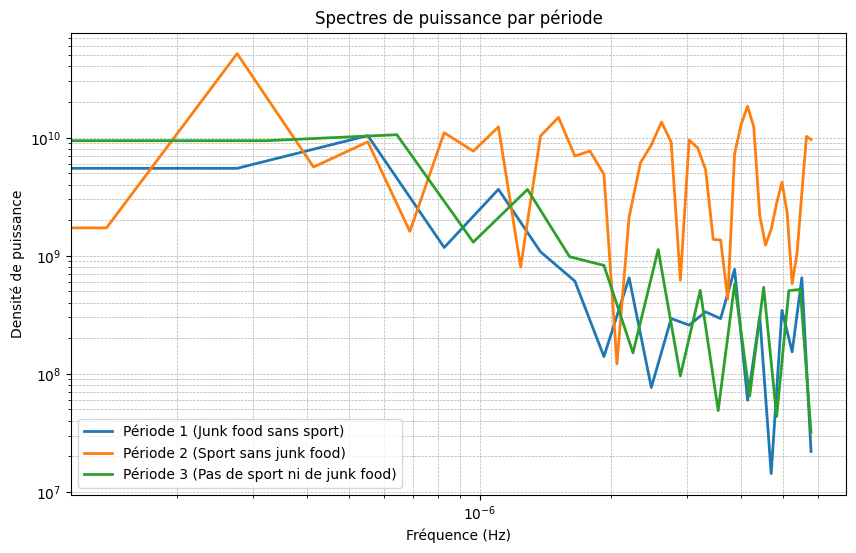

In [2]:
# Séparer les périodes
period1 = data_cleaned.iloc[:, :7]  # Junk food + Pas de sport
period2 = data_cleaned.iloc[:, 7:21]  # Pas de junk food + Sport
period3 = data_cleaned.iloc[:, 21:]  # Pas de junk food + Pas de sport

from scipy.signal import welch
import matplotlib.pyplot as plt

def compute_psd_for_combined_period(period, fs=1/86400):
    """
    Calcule le spectre de puissance d'une période combinée (tous les jours concaténés).
    Args:
        period : DataFrame contenant les données de la période (colonnes = jours).
        fs : Fréquence d'échantillonnage (1/86400 pour une donnée par jour).
    Returns:
        frequencies : Fréquences analysées.
        power : Densité spectrale de puissance associée.
    """
    combined_signal = period.values.flatten()  # Concaténer toutes les colonnes en une seule série
    f, Pxx = welch(combined_signal, fs=fs, nperseg=min(len(combined_signal), 256))
    return f, Pxx

# Calculer les spectres pour chaque période
f1, psd1 = compute_psd_for_combined_period(period1)
f2, psd2 = compute_psd_for_combined_period(period2)
f3, psd3 = compute_psd_for_combined_period(period3)

# Visualiser les spectres des périodes combinées
plt.figure(figsize=(10, 6))
plt.loglog(f1, psd1, label='Période 1 (Junk food sans sport)', lw=2)
plt.loglog(f2, psd2, label='Période 2 (Sport sans junk food)', lw=2)
plt.loglog(f3, psd3, label='Période 3 (Pas de sport ni de junk food)', lw=2)

plt.title("Spectres de puissance par période")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Densité de puissance")
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

Interprétation:

1. Période 1 - Courbe bleue
- La densité de puissance est relativement faible dans les basses fréquences, ce qui indique une faible variabilité autonome à long terme
- style de vie peu actif et une alimentation non équilibrée, le corps montre moins de résilience face aux variations à long terme (comme le stress ou la récupération).

Implication :
- Le junk food et l’absence d’exercice physique semblent réduire la régulation autonome et l’adaptabilité du système cardiovasculaire.

2. Période 2 - Courbe orange
- La densité de puissance est plus élevée dans les basses fréquences et plus équilibrée dans les fréquences moyennes et élevées.
- meilleure régulation autonome et une variabilité dynamique.

Implication :
- des bénéfices observables sur la régulation du système nerveux autonome, grâce à l’exercice et à une meilleure alimentation.

3. Période 3 - Courbe verte
- La densité de puissance est intermédiaire entre les deux autres périodes. Les basses fréquences sont légèrement plus élevées que la Période 1, mais inférieures à la Période 2.
- amélioration partielle par rapport à la Période 1, mais un manque d’activité physique limite les gains potentiels.

Implication :
- L’arrêt du junk food améliore la variabilité autonome, mais l’absence d’exercice empêche d’atteindre les bénéfices observés dans la Période 2.

Conclusions:

L’activité physique (Période 2) a le plus grand impact sur la régulation autonome, en augmentant la puissance spectrale dans les basses fréquences. L’élimination du junk food (Périodes 2 et 3) améliore la variabilité par rapport à la Période 1, mais l’exercice reste essentiel pour des résultats optimaux. Une combinaison d’exercice physique et d’une alimentation équilibrée offre la meilleure régulation du système nerveux autonome, reflétée par une puissance équilibrée sur tout le spectre.

# 2- Attracteurs

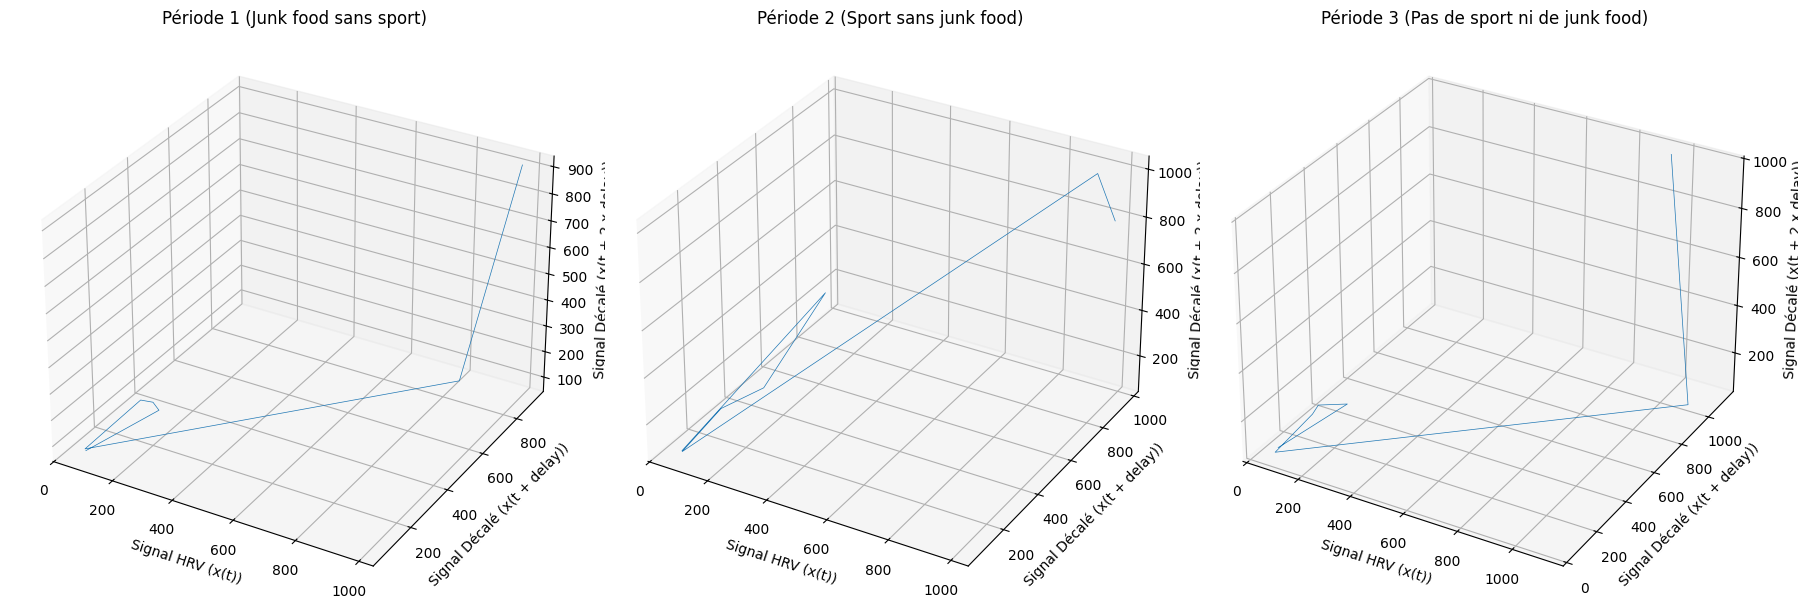

In [3]:
import matplotlib.pyplot as plt
from scipy.signal import correlate
import numpy as np

def calculate_time_delay(signal, max_lag=50):
    """
    Calcule le retard temporel optimal basé sur l'autocorrélation.
    """
    autocorr = [correlate(signal, np.roll(signal, lag), mode='valid')[0] for lag in range(1, max_lag)]
    delay = np.argmax(autocorr < 0.5 * autocorr[0]) + 1
    return delay

def reconstruct_state(signal, time_delay, embedding_dim):
    """
    Reconstruit l'espace d'état pour un signal donné.
    """
    N = len(signal)
    reconstructed = np.array([signal[i:N-(embedding_dim-1)*time_delay+i:time_delay] for i in range(embedding_dim)]).T
    return reconstructed

# Définir les périodes
periods = {
    "Période 1 (Junk food sans sport)": data_cleaned.iloc[:, :7].values.flatten(),
    "Période 2 (Sport sans junk food)": data_cleaned.iloc[:, 7:21].values.flatten(),
    "Période 3 (Pas de sport ni de junk food)": data_cleaned.iloc[:, 21:].values.flatten()
}

embedding_dim = 3  # Dimension d'embedding

# Visualisation des attracteurs avec noms explicites
fig = plt.figure(figsize=(18, 6))
for idx, (label, signal) in enumerate(periods.items(), start=1):
    # Calcul du retard temporel
    time_delay = calculate_time_delay(signal)

    # Reconstruction de l'espace d'état
    state_space = reconstruct_state(signal, time_delay, embedding_dim)

    # Visualisation des attracteurs
    ax = fig.add_subplot(1, 3, idx, projection='3d')
    ax.plot(state_space[:, 0], state_space[:, 1], state_space[:, 2], lw=0.5)
    ax.set_title(label, fontsize=12)
    ax.set_xlabel("Signal HRV (x(t))")
    ax.set_ylabel("Signal Décalé (x(t + delay))")
    ax.set_zlabel("Signal Décalé (x(t + 2 x delay))")

plt.tight_layout()
plt.show()

- Dimension 1, 2 et 3 font référence à l’espace tridimensionnel dans lequel nous “projeterons” les données temporelles pour explorer les attracteurs.
- Le retard temporel (time_delay) : Il détermine combien de points nous “décalons” dans le temps pour créer une nouvelle dimension.
- La dimension d’embedding (embedding_dim) : Elle détermine combien de dimensions nous utilisons pour représenter l’évolution temporelle du signal.

Interpretation

1. Période 1 :
- Les trajectoires semblent limitées, avec peu de complexité dans les motifs.
- Le signal est confiné dans une région spécifique, indiquant une faible variabilité dynamique.

Interprétation :

Cette période montre une régulation autonome altérée, probablement due aux effets négatifs de la consommation de junk food et au manque d’activité physique. Le système est moins adaptatif et montre une structure plus rigide.

2. Période 2 :
- Les trajectoires sont plus étendues, couvrant une région plus large dans l’espace d’état.
- Les motifs indiquent une dynamique plus riche et complexe, suggérant une meilleure variabilité.

Interprétation :

Cette période reflète les effets positifs de l’exercice physique et d’une alimentation équilibrée. Le système autonome montre une meilleure adaptabilité, typique d’une meilleure santé cardiaque et d’une régulation optimale.

3. Période 3 : 
- Les trajectoires montrent une variabilité intermédiaire, moins restreinte que dans la Période 1, mais moins étendue que dans la Période 2.
- La structure est plus complexe que celle de la Période 1, mais elle manque d’une extension significative.

Interprétation :

L’arrêt du junk food améliore la régulation autonome par rapport à la Période 1. Cependant, l’absence de sport empêche d’atteindre le niveau de variabilité observé dans la Période 2. Cela montre que l’alimentation seule ne suffit pas pour optimiser la régulation.

Comparaison Générale

1.	Dynamique Restreinte (Période 1) : Effets négatifs cumulés du junk food et du manque d’exercice.
2.	Dynamique Étendue et Complexe (Période 2) : Effets combinés positifs d’une bonne alimentation et de l’exercice, offrant la meilleure régulation autonome.
3.	Dynamique Intermédiaire (Période 3) : Amélioration par rapport à la Période 1 grâce à une meilleure alimentation, mais l’absence d’activité physique limite les bénéfices.

# 3- Dimensions fractales

In [4]:
from scipy.spatial.distance import pdist, squareform

def fractal_dimension_boxcounting(signal, max_scale=10):
    """
    Calcule la dimension fractale à l'aide de la méthode de box-counting.
    """
    scales = range(1, max_scale)
    counts = []
    for scale in scales:
        count = 0
        for i in range(0, len(signal), scale):
            count += len(np.unique(signal[i:i+scale]))
        counts.append(count)
    return np.polyfit(np.log(scales), np.log(counts), 1)[0]

# Exemple pour une période (Période 1)
signal_period1 = periods["Période 1 (Junk food sans sport)"]
fd_period1 = fractal_dimension_boxcounting(signal_period1)
print("Dimension fractale pour la Période 1 :", fd_period1)



Dimension fractale pour la Période 1 : -0.008282055707037352


# 4-Entropie approximative

In [5]:
def approximate_entropy(signal, m=2, r=0.2):
    """
    Calcule l'entropie approximative d'une série temporelle.
    
    Args:
        signal : Série temporelle (numpy array)
        m : Dimension de l'espace d'état (nombre de points consécutifs à comparer)
        r : Tolérance (seuil pour considérer deux motifs comme similaires)
    
    Returns:
        Entropie approximative (float)
    """
    def phi(m):
        # Construire un vecteur d'état de dimension m
        X = np.array([signal[i:len(signal)-m+i+1] for i in range(m)]).T
        # Calculer les proportions de motifs similaires
        C = np.sum(np.abs(X[:, None] - X[None, :]) <= r, axis=0) / len(X)
        return np.sum(np.log(C)) / len(X)

    # Calculer la différence entre les motifs de dimension m et m+1
    return phi(m) - phi(m+1)

# 5- Dimension corrélation temporelle

In [6]:
def pointwise_correlation_dimension(signal, max_distance=10):
    """
    Calcule la dimension de corrélation ponctuelle d'une série temporelle.
    
    Args:
        signal : Série temporelle (numpy array)
        max_distance : Distance maximale utilisée pour évaluer les corrélations
    
    Returns:
        Dimension de corrélation ponctuelle (float)
    """
    # Calculer les distances entre tous les points
    distances = pdist(signal[:, None])
    # Compter le nombre de distances inférieures à un seuil croissant
    counts = [np.sum(distances < d) for d in range(1, max_distance)]
    # Ajuster une droite sur les données en échelle logarithmique
    return np.polyfit(np.log(range(1, max_distance)), np.log(counts), 1)[0]

# 6- Analyse de la fluctuation sans tendance (dfa?)

In [7]:
def detrended_fluctuation_analysis(signal):
    """
    Calcule l'analyse de fluctuation sans tendance (DFA) pour détecter des corrélations longues.
    
    Args:
        signal : Série temporelle (numpy array)
    
    Returns:
        Exposant DFA (float)
    """
    n = len(signal)
    # Calculer la série cumulée
    Y = np.cumsum(signal - np.mean(signal))
    # Définir les échelles
    scales = np.arange(4, n//4)
    fluctuations = []
    for scale in scales:
        # Diviser en segments
        segments = n // scale
        local_trends = []
        for seg in range(segments):
            # Extraire un segment
            segment = Y[seg*scale:(seg+1)*scale]
            # Ajuster une tendance locale linéaire
            poly = np.polyfit(range(scale), segment, 1)
            detrended = segment - np.polyval(poly, range(scale))
            # Calculer la fluctuation moyenne
            local_trends.append(np.sqrt(np.mean(detrended**2)))
        # Moyenne sur tous les segments
        fluctuations.append(np.mean(local_trends))
    # Ajuster une droite sur les données log-log
    return np.polyfit(np.log(scales), np.log(fluctuations), 1)[0]

# 7- Exposant Lyapunov

In [8]:
def lyapunov_exponent(signal, embedding_dim, time_delay):
    """
    Calcule l'exposant de Lyapunov pour quantifier le chaos dans une série temporelle.
    
    Args:
        signal : Série temporelle (numpy array)
        embedding_dim : Dimension d'embedding
        time_delay : Retard temporel pour la reconstruction d'état
    
    Returns:
        Exposant de Lyapunov (float)
    """
    # Reconstruire l'espace d'état
    state_space = reconstruct_state(signal, time_delay, embedding_dim)
    N = len(state_space)
    # Calculer les distances entre trajectoires successives
    distances = np.log(np.abs(state_space[1:] - state_space[:-1]))
    # Moyenne des distances logarithmiques
    return np.mean(distances)

In [16]:
import pandas as pd

# Définir les périodes directement
signal_period1 = periods["Période 1 (Junk food sans sport)"]
signal_period2 = periods["Période 2 (Sport sans junk food)"]
signal_period3 = periods["Période 3 (Pas de sport ni de junk food)"]

# Réunir les analyses pour chaque période
analyses = {}

for label, signal in [("Période 1", signal_period1), 
                      ("Période 2", signal_period2), 
                      ("Période 3", signal_period3)]:
    fd = fractal_dimension_boxcounting(signal)
    apen = approximate_entropy(signal)
    pc_dim = pointwise_correlation_dimension(signal)
    dfa = detrended_fluctuation_analysis(signal)
    lyap = lyapunov_exponent(signal, embedding_dim=3, time_delay=1)  # Exposant Lyapunov
    
    # Stocker les résultats dans un dictionnaire
    analyses[label] = {
        "Dimension Fractale": fd,
        "Entropie Approximative": apen,
        "Dimension Corrélation Ponctuelle": pc_dim,
        "Analyse Fluctuation Sans Tendance": dfa,
        "Exposant Lyapunov": lyap
    }

# Convertir les résultats en DataFrame pour affichage
results_df = pd.DataFrame(analyses).T
results_df.to_csv("non_linear_analysis_results.csv", index=True)
display(results_df)

/var/folders/qx/1f46qx2d38zfm39064m17wxm0000gn/T/ipykernel_12201/3284644047.py:17: RuntimeWarning: divide by zero encountered in log
  distances = np.log(np.abs(state_space[1:] - state_space[:-1]))


,Dimension Fractale,Entropie Approximative,Dimension Corrélation Ponctuelle,Analyse Fluctuation Sans Tendance,Exposant Lyapunov
Période 1,-0.008282,3.487081,0.710520,1.347257,-inf
Période 2,-0.011820,4.206363,0.750868,1.161739,2.840157
Période 3,-0.006077,3.381256,0.589169,2.208475,2.679101


# pour dimension fractales

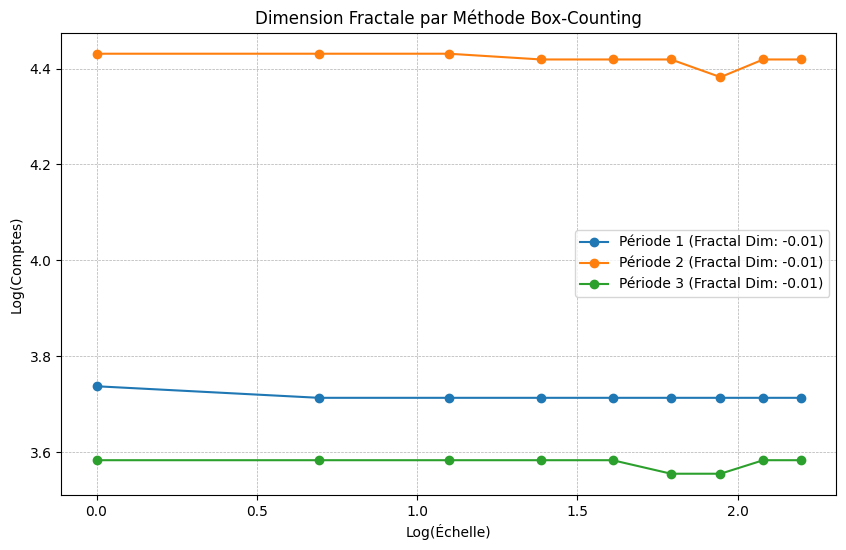

In [12]:
def plot_fractal_dimension(signal, label, max_scale=10):
    scales = range(1, max_scale)
    counts = []
    for scale in scales:
        count = 0
        for i in range(0, len(signal), scale):
            count += len(np.unique(signal[i:i+scale]))
        counts.append(count)
    coeff = np.polyfit(np.log(scales), np.log(counts), 1)
    plt.plot(np.log(scales), np.log(counts), marker='o', label=f"{label} (Fractal Dim: {coeff[0]:.2f})")

# Tracer pour chaque période
plt.figure(figsize=(10, 6))
for label, signal in [("Période 1", signal_period1),
                      ("Période 2", signal_period2),
                      ("Période 3", signal_period3)]:
    plot_fractal_dimension(signal, label)

plt.title("Dimension Fractale par Méthode Box-Counting")
plt.xlabel("Log(Échelle)")
plt.ylabel("Log(Comptes)")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()

# Pour la corrélation ponctuelle

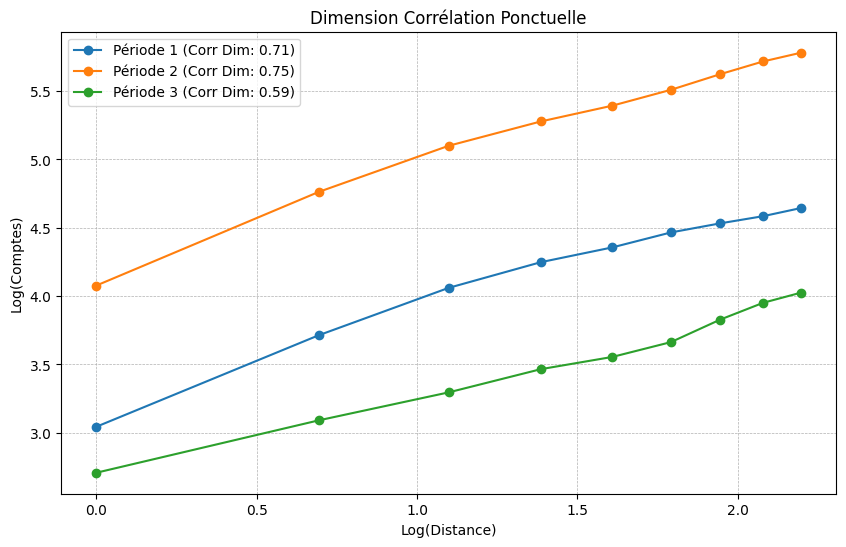

In [13]:
def plot_pointwise_correlation_dimension(signal, label, max_distance=10):
    distances = pdist(signal[:, None])
    counts = [np.sum(distances < d) for d in range(1, max_distance)]
    coeff = np.polyfit(np.log(range(1, max_distance)), np.log(counts), 1)
    plt.plot(np.log(range(1, max_distance)), np.log(counts), marker='o', label=f"{label} (Corr Dim: {coeff[0]:.2f})")

# Tracer pour chaque période
plt.figure(figsize=(10, 6))
for label, signal in [("Période 1", signal_period1),
                      ("Période 2", signal_period2),
                      ("Période 3", signal_period3)]:
    plot_pointwise_correlation_dimension(signal, label)

plt.title("Dimension Corrélation Ponctuelle")
plt.xlabel("Log(Distance)")
plt.ylabel("Log(Comptes)")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()

# Pour la DFA

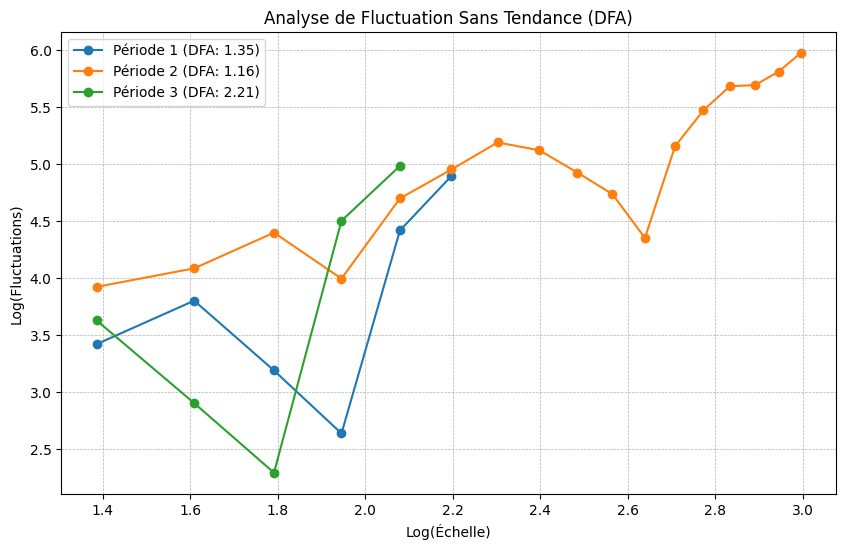

In [14]:
def plot_dfa(signal, label):
    n = len(signal)
    Y = np.cumsum(signal - np.mean(signal))
    scales = np.arange(4, n//4)
    fluctuations = []
    for scale in scales:
        segments = n // scale
        local_trends = []
        for seg in range(segments):
            segment = Y[seg*scale:(seg+1)*scale]
            poly = np.polyfit(range(scale), segment, 1)
            detrended = segment - np.polyval(poly, range(scale))
            local_trends.append(np.sqrt(np.mean(detrended**2)))
        fluctuations.append(np.mean(local_trends))
    coeff = np.polyfit(np.log(scales), np.log(fluctuations), 1)
    plt.plot(np.log(scales), np.log(fluctuations), marker='o', label=f"{label} (DFA: {coeff[0]:.2f})")

# Tracer pour chaque période
plt.figure(figsize=(10, 6))
for label, signal in [("Période 1", signal_period1),
                      ("Période 2", signal_period2),
                      ("Période 3", signal_period3)]:
    plot_dfa(signal, label)

plt.title("Analyse de Fluctuation Sans Tendance (DFA)")
plt.xlabel("Log(Échelle)")
plt.ylabel("Log(Fluctuations)")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()